# Exercise 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

## a)

In [2]:
df = pd.read_csv('temperatures_dortmund.csv')
df

,Date,Time,Measurement,Temperature
0,01.01.2000,00:00,2000.000000,3.0
1,01.01.2000,00:15,2000.000028,3.0
2,01.01.2000,00:30,2000.000057,3.0
3,01.01.2000,00:45,2000.000085,3.0
4,01.01.2000,01:00,2000.000114,3.0
...,...,...,...,...
307885,31.12.2008,23:10,2008.999905,-4.0
307886,31.12.2008,23:20,2008.999924,-3.0
307887,31.12.2008,23:30,2008.999943,-3.0
307888,31.12.2008,23:40,2008.999962,-4.0


Fourier Analyse ist nicht möglich, da die Messdaten nicht äquidistant genommen wurden. Lomb-Scargle ist jedoch anwendbar.

## b)
Vorbereiten des Datensatzes

In [3]:
df = df.dropna() # drop all NaN entries
df = df[df.Measurement < 2009] # some entries have comma at wrong place, causing time > 2009

## c)

Anwenden von lomb scargle. Frequenzen mit Periodendauern im Tage/Wochen/Monate Bereich können nicht
aufgelöst werden, teste also zwischen f=0 (konstante Temperatur) und f=2. Für alle f>2 liefert
lomb scargle keinen Beitrag.

In [4]:
from scipy.signal import lombscargle

data = df.to_numpy()

temp = data[:,3]
time = data[:,2]

n_frequencies = 1000
f = np.linspace(0.01, 2, n_frequencies)

pgram = lombscargle(time, temp, 2*np.pi*f, normalize=True)

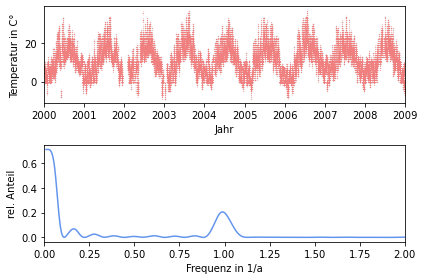

In [5]:
fig, ax = plt.subplots(2,1)

ax[0].plot(time, temp, marker = ".", ms = 0.1, lw = 0, c = "lightcoral")
ax[0].set_xlim(2000, 2009)
ax[0].set_xlabel("Jahr")
ax[0].set_ylabel("Temperatur in C°")

ax[1].plot(f, pgram, c = "cornflowerblue")
ax[1].set_xlim(0, 2)
ax[1].set_xlabel("Frequenz in 1/a")
ax[1].set_ylabel("rel. Anteil")

fig.tight_layout()

## d)